In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/hr.csv")

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,IT,low,NaN
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.0
2,0.45,0.45,2,154,3,1,1,0,support,medium,NaN
3,0.46,0.73,6,256,4,0,0,0,product_mng,high,NaN
4,0.14,0.54,5,275,4,1,0,0,sales,high,NaN


In [ ]:
df.shape

(15004, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15004 non-null  float64
 1   last_evaluation        15004 non-null  float64
 2   number_project         15004 non-null  int64  
 3   average_montly_hours   15004 non-null  int64  
 4   time_spend_company     15004 non-null  int64  
 5   Work_accident          15004 non-null  int64  
 6   left                   15004 non-null  object 
 7   promotion_last_5years  15004 non-null  int64  
 8   Department             15004 non-null  object 
 9   salary                 14975 non-null  object 
 10  age                    3080 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.3+ MB


* In this dataset, the columns left, Department and salary are categorical data and others are numerical.

* The columns salary and age has null values.

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,age
count,15004.000000,15004.000000,15004.000000,15004.000000,15004.000000,15004.000000,15004.000000,3080.000000
mean,0.612871,0.716096,3.802919,201.044655,3.497934,0.144561,0.021261,27.018506
std,0.248628,0.171163,1.232550,49.937662,1.460012,0.351670,0.144258,1.429511
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,25.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,26.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,27.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,28.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,29.000000


In [ ]:
df.describe(include="object")

,left,Department,salary
count,15004,15004,14975
unique,3,10,3
top,0,sales,low
freq,11428,4140,7289


In [ ]:
df.isna().sum()

satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours         0
time_spend_company           0
Work_accident                0
left                         0
promotion_last_5years        0
Department                   0
salary                      29
age                      11924
dtype: int64

The column salary has 29 missing data and column age has 11924 missing data.

In [ ]:
df.isna().sum()/len(df)

satisfaction_level       0.000000
last_evaluation          0.000000
number_project           0.000000
average_montly_hours     0.000000
time_spend_company       0.000000
Work_accident            0.000000
left                     0.000000
promotion_last_5years    0.000000
Department               0.000000
salary                   0.001933
age                      0.794721
dtype: float64


Since the column age has missing data greater than 70% we drop the column.

In [ ]:
df.drop(['age'], axis=1, inplace = True)

<Axes: xlabel='left', ylabel='count'>

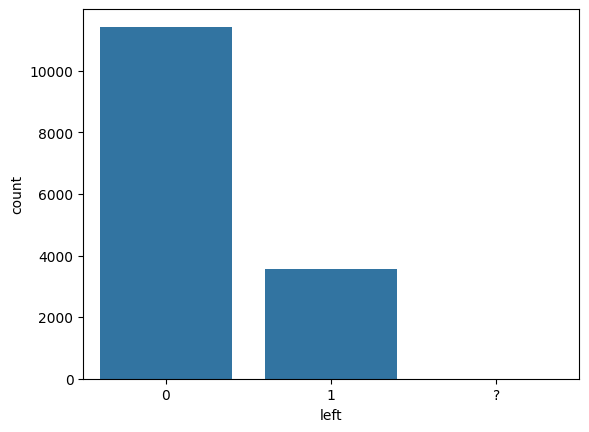

In [ ]:
sns.countplot(x="left", data=df)

There are many employees who did not leave in comparison to who left.

In [ ]:
df.sample()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
8759,0.89,0.95,4,275,5,0,1,0,technical,medium


In [ ]:
df.salary.unique()

array(['low', 'medium', 'high', nan], dtype=object)

In [ ]:
# def fill_salary(column):
#  if pd.isnull(salary):
#    return 'medium'
#  else:
#    return salary
# df.salary = df['salary'].apply(fill_salary)

In [ ]:
df.salary = df['salary'].fillna('medium')

In [ ]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [ ]:
df.sample()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
6302,0.8,0.75,3,134,4,0,0,0,sales,medium


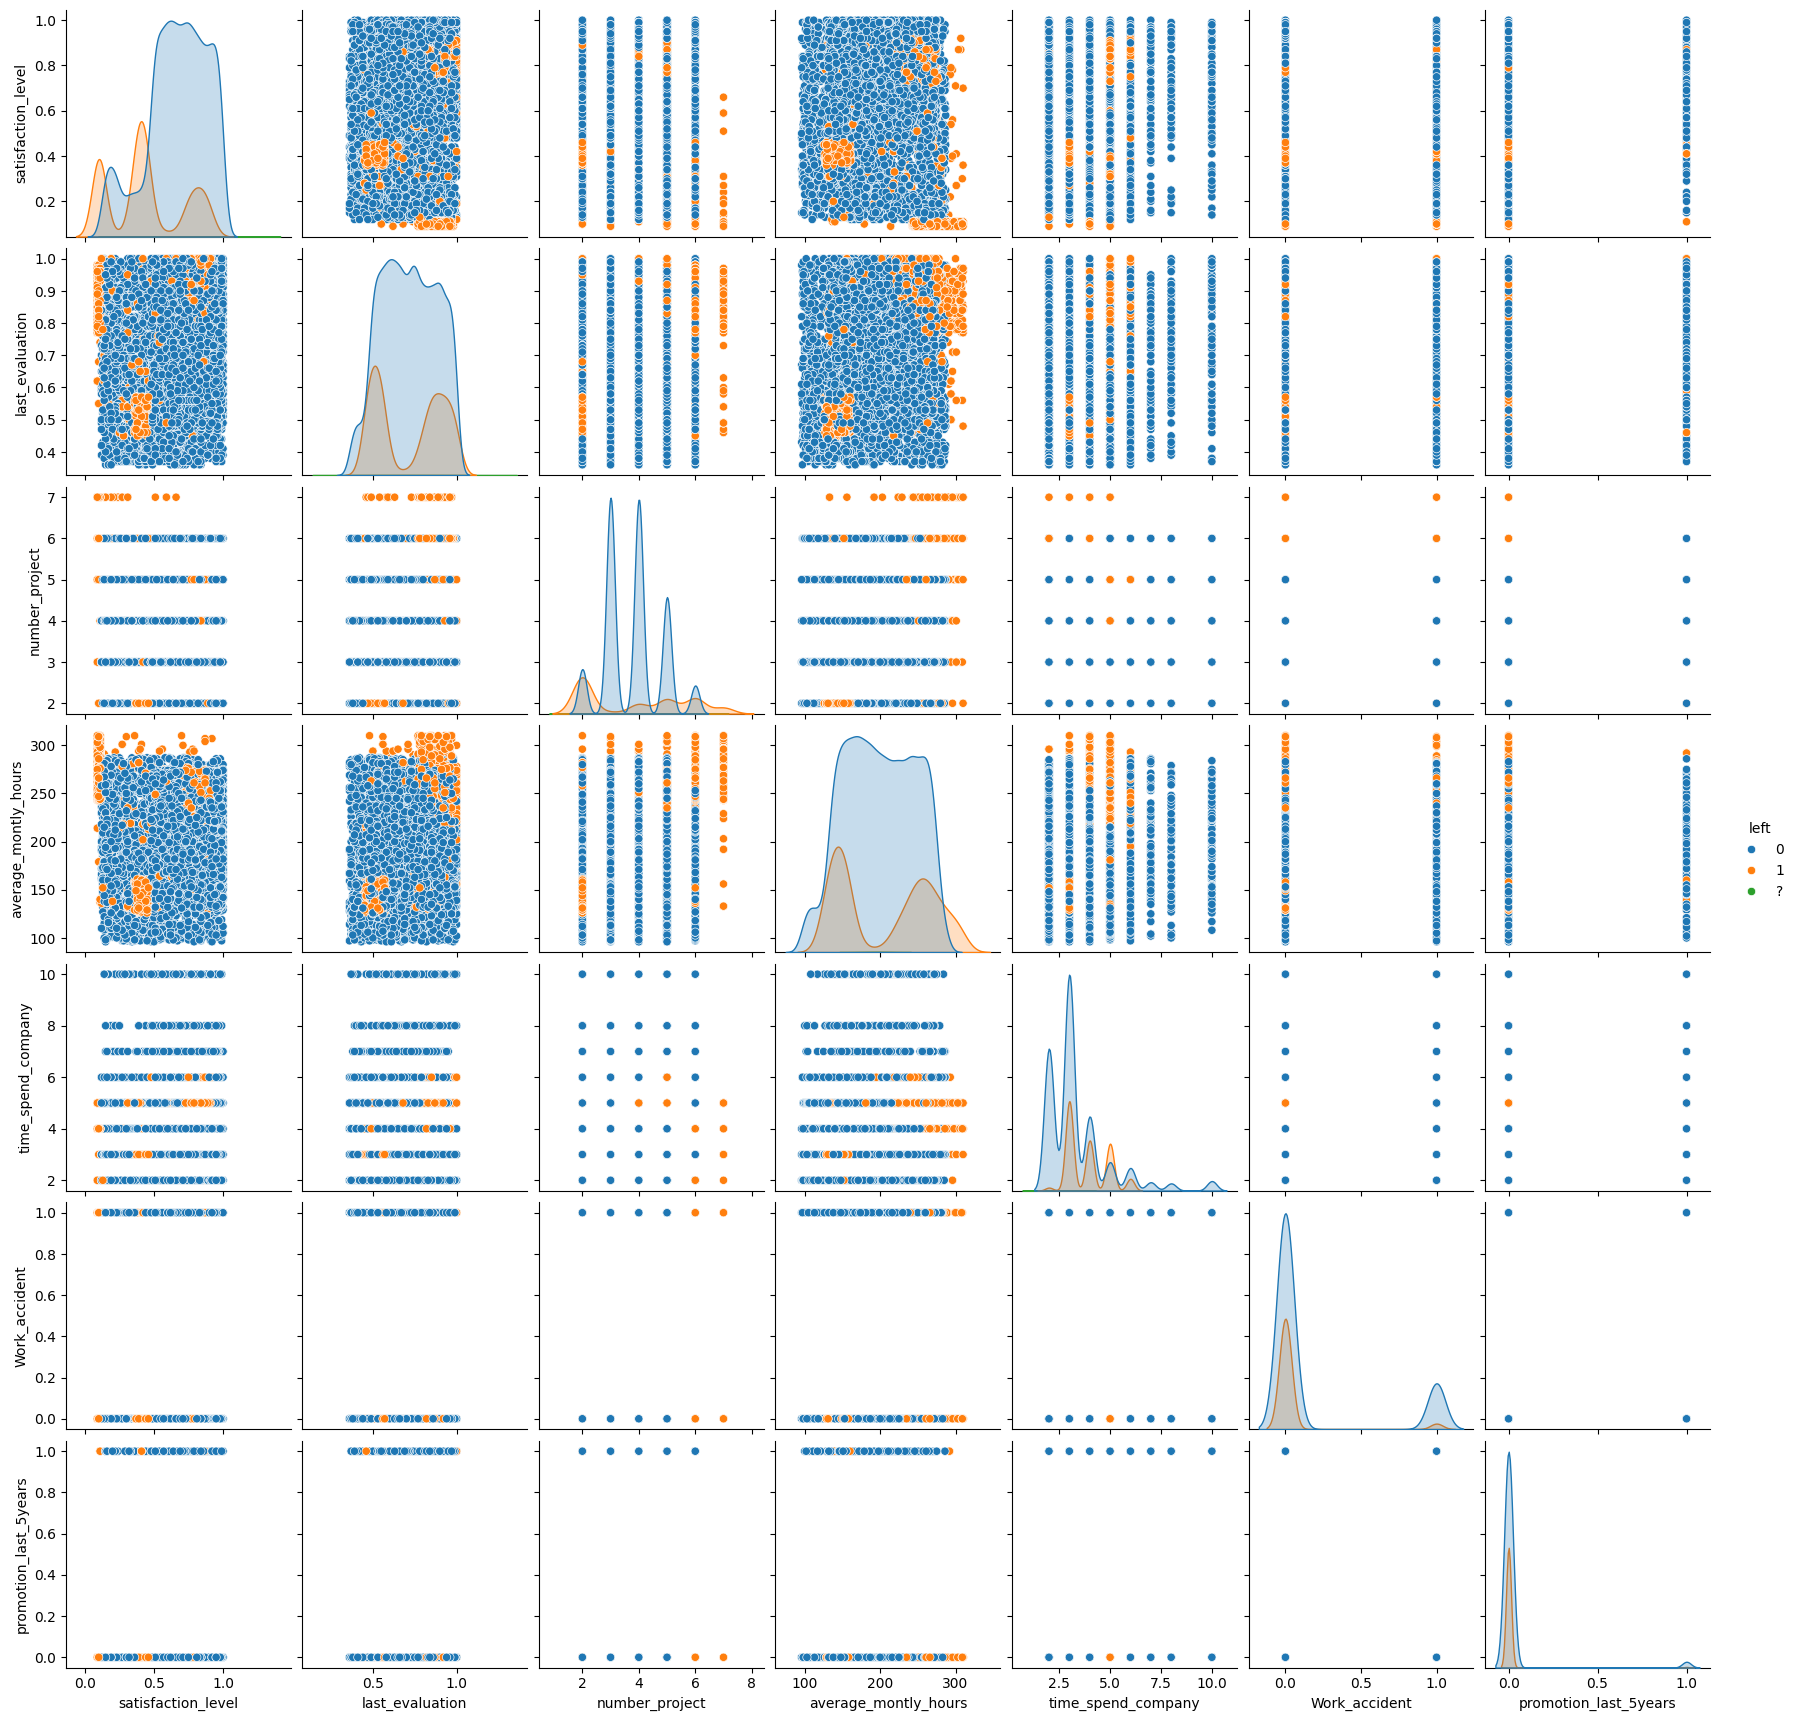

In [ ]:
sns.pairplot(df, hue="left")

In [ ]:
df.left.unique()

array(['0', '1', '?'], dtype=object)

In [ ]:
(df[df['left']=='?'])

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
7864,0.72,0.67,5,210,2,0,?,0,management,medium
8309,0.96,0.54,3,198,3,0,?,0,support,low
10830,0.55,0.96,3,194,3,0,?,0,product_mng,medium
12652,0.96,0.75,4,177,2,0,?,0,IT,low


<Axes: >

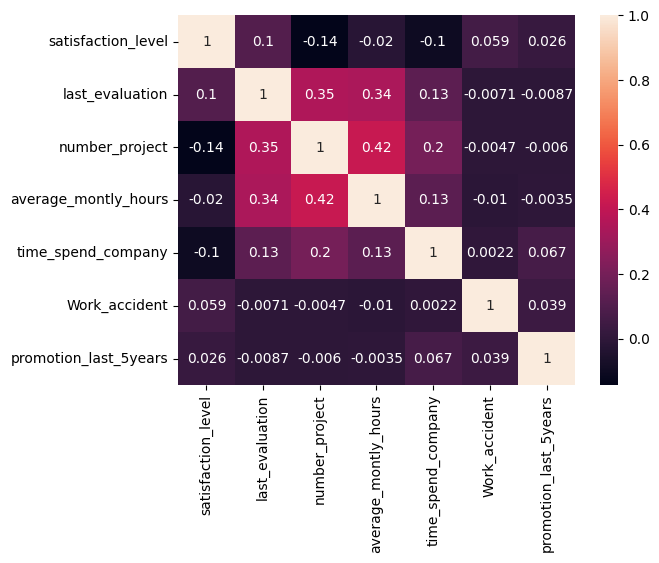

In [ ]:
sns.heatmap(df.corr(numeric_only= True), annot=True)

* The correlation between number_project and average_montly_hours is 0.42.
* The correlation between number_project and last_evaluation is 0.35.
* The correlation between last_evaluation and average_montly_hours is 0.34.

Here we can see that number_project, average_montly_hours and last_evaluation are correlated to each other. Those three are independent variables but are correlated to each other so there exists multi-colinearity.
So, we can drop two columns and use one.

In this case since number_project has high correlation value with other two columns we use number_project and drop other two.

<Axes: xlabel='left', ylabel='average_montly_hours'>

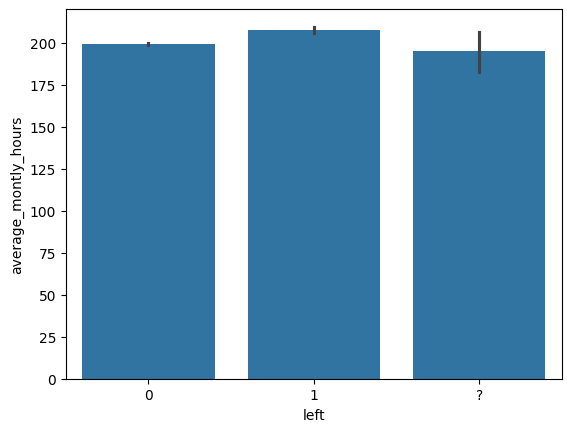

In [ ]:
sns.barplot(x="left", y="average_montly_hours", data=df)

In [ ]:
df.drop(df[['average_montly_hours', 'last_evaluation']], axis=1, inplace=True)

In [ ]:
df.sample()

,satisfaction_level,number_project,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
4739,0.44,2,2,0,0,0,technical,low


In [ ]:
df["promotion_last_5years"].unique()

array([0, 1])

In [ ]:
df["Work_accident"].unique()

array([0, 1])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Left'] = le.fit_transform(df['left'])

<Axes: xlabel='promotion_last_5years', ylabel='count'>

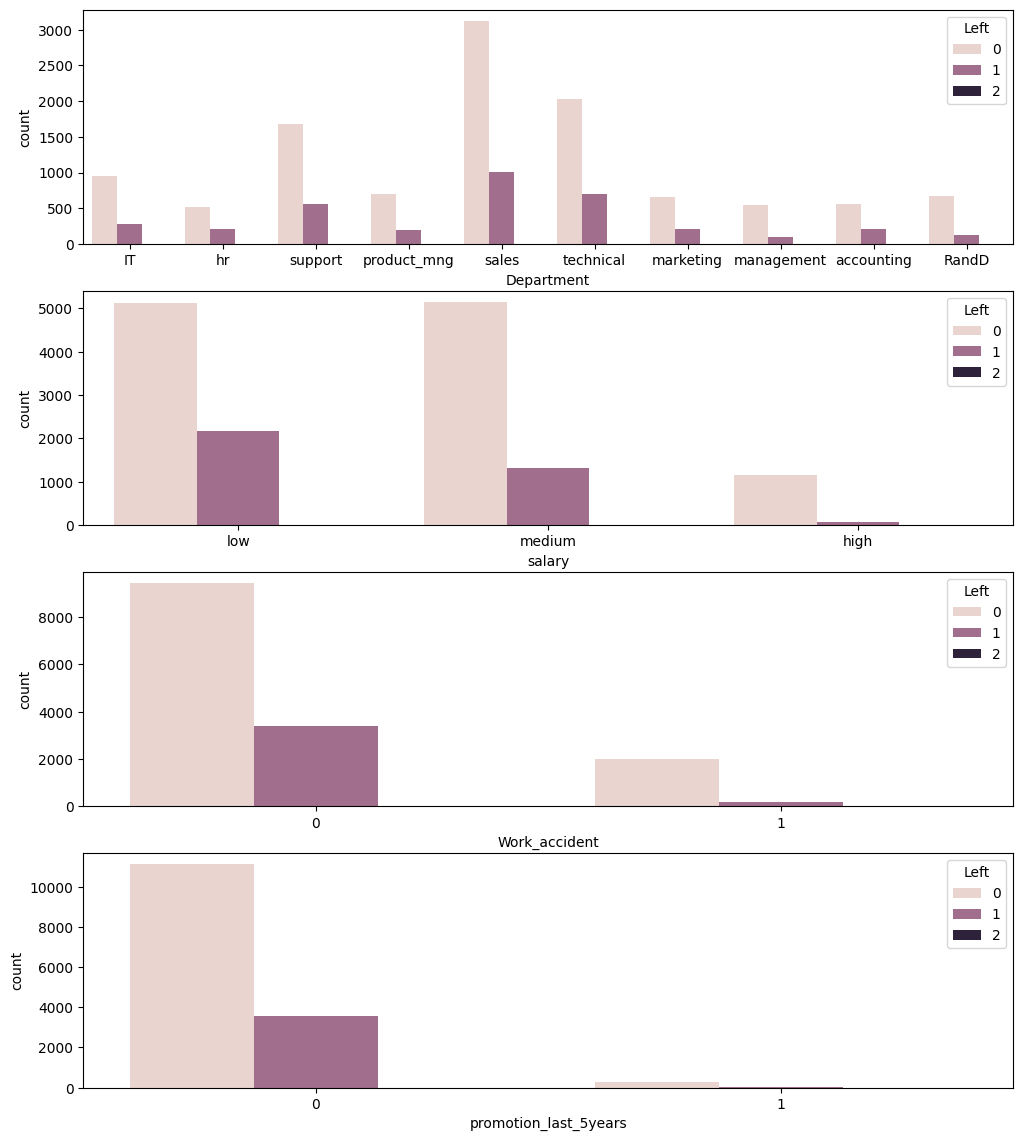

In [ ]:
plt.figure(figsize=(12,14))
plt.subplot(4,1,1)
sns.countplot(x="Department", hue="Left", data=df)
plt.subplot(4,1,2)
sns.countplot(x="salary", hue="Left", data=df)
plt.subplot(4,1,3)
sns.countplot(x="Work_accident",hue="Left",  data=df)
plt.subplot(4,1,4)
sns.countplot(x="promotion_last_5years",hue="Left",  data=df)

* we cannot drop Department column because the highest number of people leaving are from sales department.

* also from the salary coutplot we can see that as salary is low people leaving were higher so we do not drop this column too

* people getting promotion donot leave so we keep the column

* however although there was no work accident people left that means people leaving is not related to work accident hence we drop Work_accident column.

In [ ]:
df.drop(df[['left','Work_accident']], axis=1, inplace=True)

In [ ]:
#columns = ["satisfaction_level",	"average_montly_hours",	"time_spend_company",	"Work_accident", "promotion_last_5years"]

In [ ]:
X= df.iloc[:, :-1]
y = df.Left

In [ ]:
X.sample()

,satisfaction_level,number_project,time_spend_company,promotion_last_5years,Department,salary
3939,0.97,3,3,0,management,low


In [ ]:
X_encoded = pd.get_dummies(columns = ['Department','salary'], data=X, drop_first=True)
X_encoded.head(3)

,satisfaction_level,number_project,time_spend_company,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.24,2,5,0,0,0,0,0,0,0,0,0,0,1,0
1,0.40,2,3,0,0,0,1,0,0,0,0,0,0,0,1
2,0.45,2,3,0,0,0,0,0,0,0,0,1,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=40)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

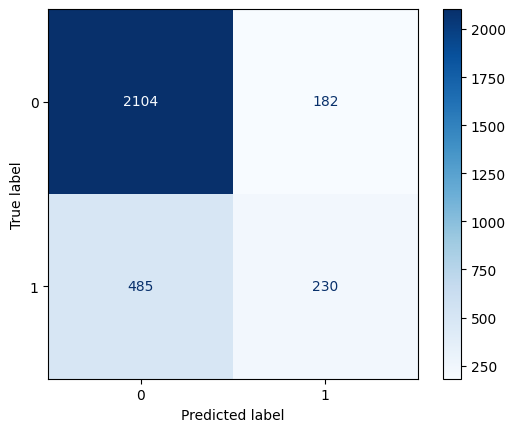

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues")

In [ ]:
print("Precision score= ",precision_score(y_test, y_pred))
print("Recall score= ", recall_score(y_test, y_pred))
print("f1 score= ", f1_score(y_test, y_pred))

Precision score=  0.558252427184466
Recall score=  0.32167832167832167
f1 score=  0.4081632653061224


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      2286
           1       0.56      0.32      0.41       715

    accuracy                           0.78      3001
   macro avg       0.69      0.62      0.64      3001
weighted avg       0.75      0.78      0.75      3001



In [ ]:
X= df.iloc[:, :-1]
y = df.Left

X_encoded = pd.get_dummies(columns = ['Department','salary'], data=X, drop_first=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=40)

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

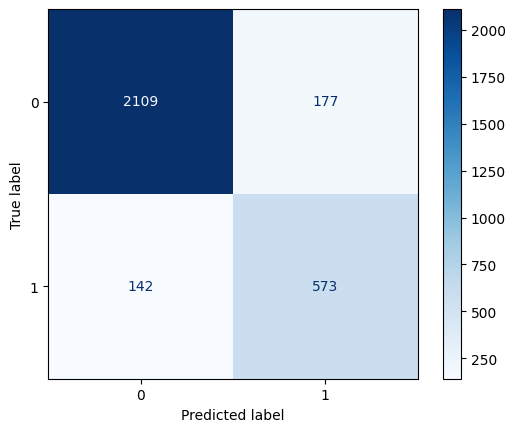

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues")

In [ ]:
print("Precision score= ",precision_score(y_test, y_pred))
print("Recall score= ", recall_score(y_test, y_pred))
print("f1 score= ", f1_score(y_test, y_pred))

Precision score=  0.764
Recall score=  0.8013986013986014
f1 score=  0.7822525597269624


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2286
           1       0.76      0.80      0.78       715

    accuracy                           0.89      3001
   macro avg       0.85      0.86      0.86      3001
weighted avg       0.90      0.89      0.89      3001



              Logistic                
* Precision score = 0.558252427184466
* Recall score = 0.32167832167832167
* f1 score = 0.4081632653061224

            SVC              
* Precision score = 0.764
* Recall score = 0.8013986013986014
* f1 score = 0.7822525597269624

Here, SVC has a higher precision rate than that of logistic which means that when it predicts that the employee will leave it is 76.4% sure that they will.

Also, SVC has higher recall rate which suggests that it correctly predicted 80.13% employee who left.

Hence SVC model is better than Logistic Regression in this dataset.